# Projet 3 – Anticiper la consommation énergétique de bâtiments

Vous mettrez en œuvre un modèle de régression pour prédire les besoins énergétiques de bâtiments publics afin de contribuer à la transition énergétique d'une ville.

🔧 Objectifs :
- Nettoyage automatisé des données
- Préparation des variables (mise à l’échelle, encodage)
- Entraînement et évaluation d’un modèle supervisé

Data : 
- Données issues de [UCI](https://archive.ics.uci.edu/dataset/242/energy+efficiency)

In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

FILE = "ENB2012_data"
DATA = pd.read_excel(f"../data/{FILE}.xlsx")
print(DATA.columns)
print(DATA.shape)
DATA.head()

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')
(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


|Variable Name|Role|Type|Description|Units|Missing Values|
|-|-|-|-|-|-|
|X1|Feature|Continuous|Relative Compactness||no|
|X2|Feature|Continuous|Surface Area||no|
|X3|Feature|Continuous|Wall Area||no|
|X4|Feature|Continuous|Roof Area||no|
|X5|Feature|Continuous|Overall Height||no|
|X6|Feature|Integer|Orientation||no|
|X7|Feature|Continuous|Glazing Area||no|
|X8|Feature|Integer|Glazing Area Distribution||no|
|Y1|Target|Continuous|Heating Load||no|
|Y2|Target|Continuous|Cooling Load||no|

In [12]:
DATA_COLUMNS_MD = ["Relative Compactness",
                   "Surface Area",
                   "Wall Area",
                   "Roof Area",
                   "Overall Height",
                   "Orientation",
                   "Glazing Area",
                   "Glazing Area Distribution",
                   "Heating Load",
                   "Cooling Load"]

DATA.columns = DATA_COLUMNS_MD
print(DATA.columns)
print(DATA.shape)
DATA.head()

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')
(768, 10)


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Données non normalisées

Mean Squared Error: 9.8102
R^2 Score: 0.8997


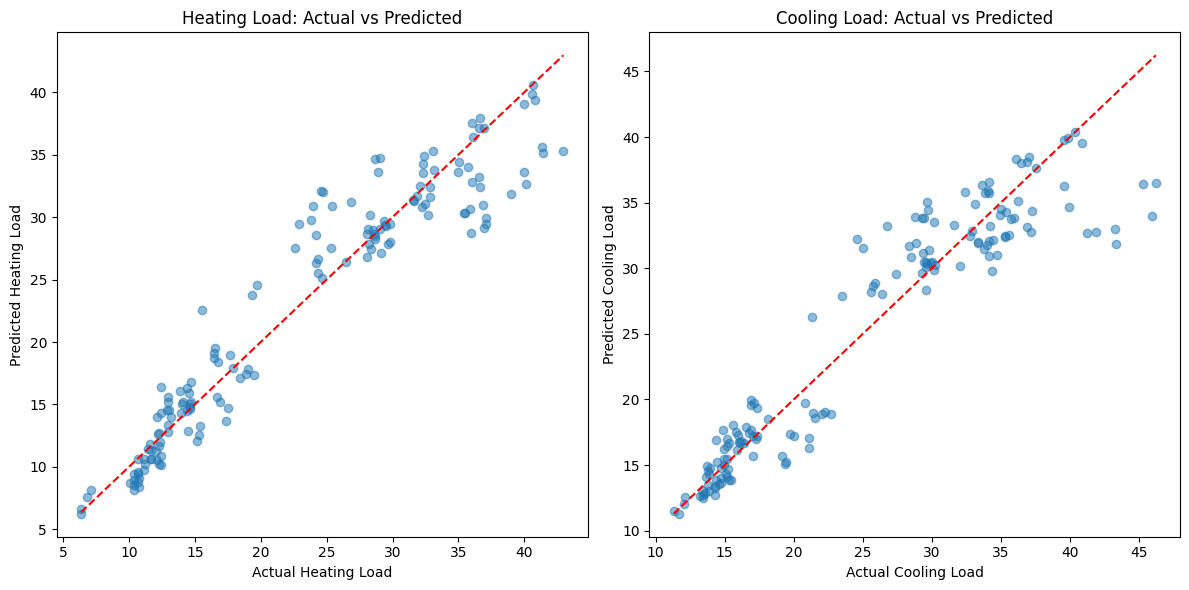

In [24]:
COLUMNS_TARGET = ["Heating Load", "Cooling Load"]

X = DATA.drop(columns=COLUMNS_TARGET)
Y = DATA[COLUMNS_TARGET]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_test["Heating Load"], Y_pred[:, 0], alpha=0.5)
plt.plot([Y_test["Heating Load"].min(), Y_test["Heating Load"].max()],
         [Y_test["Heating Load"].min(), Y_test["Heating Load"].max()],
         color='red', linestyle='--')
plt.title("Heating Load: Actual vs Predicted")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.subplot(1, 2, 2)
plt.scatter(Y_test["Cooling Load"], Y_pred[:, 1], alpha=0.5)
plt.plot([Y_test["Cooling Load"].min(), Y_test["Cooling Load"].max()],
         [Y_test["Cooling Load"].min(), Y_test["Cooling Load"].max()],
         color='red', linestyle='--')
plt.title("Cooling Load: Actual vs Predicted")
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.tight_layout()
plt.show()

## Normalisation des données

In [25]:
NORMALIZE = DATA.copy()
print(NORMALIZE.shape)

for col in NORMALIZE.columns:
    NORMALIZE[col] = NORMALIZE[col].astype(float)
    NORMALIZE[col] = NORMALIZE[col].dropna()
    NORMALIZE[col] /= NORMALIZE[col].max()
        
print(NORMALIZE.shape)
NORMALIZE.head()

(768, 10)
(768, 10)


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,1.000000,0.636364,0.705882,0.500000,1.0,0.4,0.0,0.0,0.360789,0.444097
1,1.000000,0.636364,0.705882,0.500000,1.0,0.6,0.0,0.0,0.360789,0.444097
2,1.000000,0.636364,0.705882,0.500000,1.0,0.8,0.0,0.0,0.360789,0.444097
3,1.000000,0.636364,0.705882,0.500000,1.0,1.0,0.0,0.0,0.360789,0.444097
4,0.918367,0.696970,0.764706,0.555556,1.0,0.4,0.0,0.0,0.483527,0.588799


Modèle de régréssion

Mean Squared Error: 0.0048
R^2 Score: 0.8985


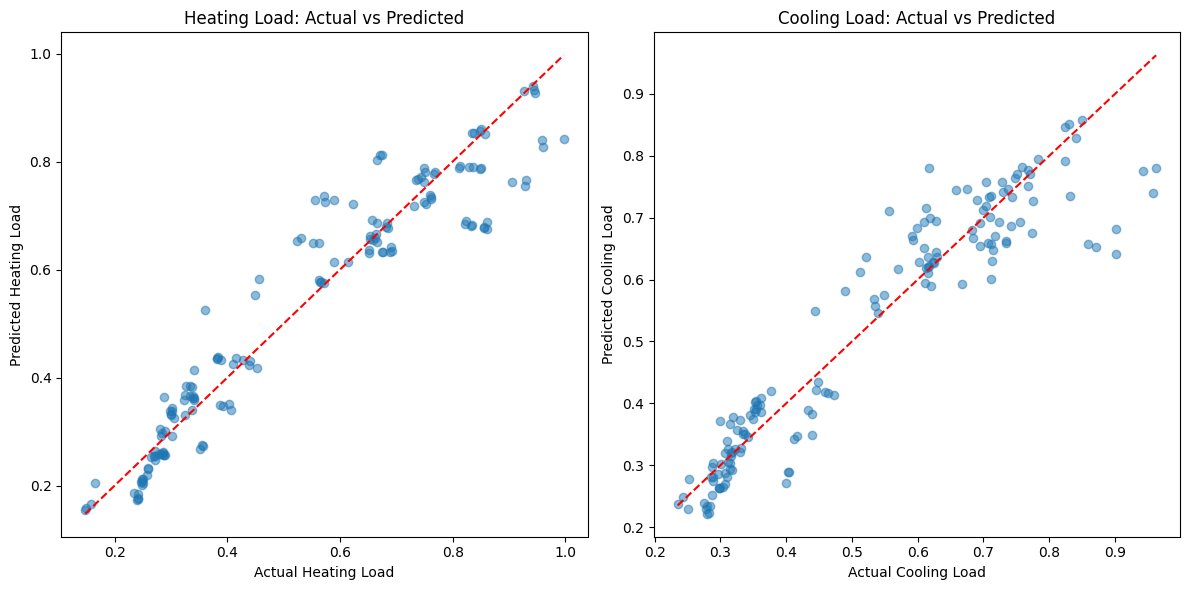

In [26]:
COLUMNS_TARGET = ["Heating Load", "Cooling Load"]

X = NORMALIZE.drop(columns=COLUMNS_TARGET)
Y = NORMALIZE[COLUMNS_TARGET]

# Modèle de régression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_n = scaler.fit_transform(X_train_n)
X_test_scaled_n = scaler.transform(X_test_n)

model_n = LinearRegression()
model_n.fit(X_train_scaled_n, Y_train_n)
Y_pred_n = model_n.predict(X_test_scaled_n)
mse = mean_squared_error(Y_test_n, Y_pred_n)
r2 = r2_score(Y_test_n, Y_pred_n)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_test_n["Heating Load"], Y_pred_n[:, 0], alpha=0.5)
plt.plot([Y_test_n["Heating Load"].min(), Y_test_n["Heating Load"].max()],
         [Y_test_n["Heating Load"].min(), Y_test_n["Heating Load"].max()],
         color='red', linestyle='--')
plt.title("Heating Load: Actual vs Predicted")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.subplot(1, 2, 2)
plt.scatter(Y_test_n["Cooling Load"], Y_pred_n[:, 1], alpha=0.5)
plt.plot([Y_test_n["Cooling Load"].min(), Y_test_n["Cooling Load"].max()],
         [Y_test_n["Cooling Load"].min(), Y_test_n["Cooling Load"].max()],
         color='red', linestyle='--')
plt.title("Cooling Load: Actual vs Predicted")
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.tight_layout()
plt.show()

## Comparaison des modèles

In [28]:
print("Comparaison des modèles :")
print(f"Modèle sans normalisation - MSE: {mean_squared_error(Y_test, Y_pred):.4f}, R^2: {r2_score(Y_test, Y_pred):.4f}")
print(f"Modèle avec normalisation - MSE: {mean_squared_error(Y_test_n, Y_pred_n):.4f}, R^2: {r2_score(Y_test_n, Y_pred_n):.4f}")

Comparaison des modèles :
Modèle sans normalisation - MSE: 9.8102, R^2: 0.8997
Modèle avec normalisation - MSE: 0.0048, R^2: 0.8985


Les R^2 scores sont les mêmes donc les modèles sont similaires. De plus les R^2 scores sont prochent de `1` mais pas non plus extrèmement élevé (proche de 90% et non 95%)

Ainsi avec ce modèle il est possible de prédire le cooling load et le heating load à 90%